In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('bmh')

In [3]:
files = [
    ("fe1", (1, 2, 3)),
    ("fe1half", (0, 1, 2)),
    ("fe2", (0, 1, 2, 3, 4)),
    ("fe2half", (0, 1, 2)),
    ("fe3", (0, 1, 2, 3)),
    ("fe3half", (0, 1, 2)),
    ("fe4", (0, 1, 2, 3, 4, 5))
]
labels = [
    "1.0mL",
    "1.5mL",
    "2.0mL",
    "2.5mL",
    "3.0mL",
    "3.5mL",
    "4.0mL"
]

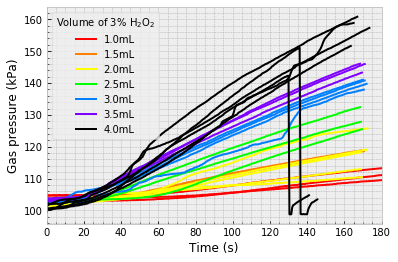

In [12]:
plt.figure()

colours = ["#ff0000", "#ff8000", "#ffff00",
           "#00ff00", "#0080ff", "#7f00ff", 
           "#000000"]

ls = []

for i, (fname, fnums) in enumerate(files):
    for fnum in fnums:
        df = pd.read_csv(f"{fname}{fnum}.csv")
        for t in range(1, len(df.time)):
            rate_at_t = (df.Pressure[t] - df.Pressure[t - 1]) / (df.time[t] - df.time[t - 1])
            if rate_at_t >= 1.2:
                break
        else:
            t = 0

        l, = plt.plot(df.time[t:] - df.time[t], 
                      df.Pressure[t:], 
                      color=colours[i])
        if fnum == max(fnums):
            ls.append(l)


plt.xlim(0, 180)
plt.xlabel("Time (s)")        
plt.ylabel("Gas pressure (kPa)")

plt.legend(ls, labels, title="Volume of 3% $\mathregular{H_2O_2}$")

plt.minorticks_on()
plt.grid(which='minor')

plt.savefig('raw_data.png', dpi=300)

plt.show()

In [5]:
t_df = pd.Series()
for i, (fname, fnums) in enumerate(files):
    for fnum in fnums:
        df = pd.read_csv(f"{fname}{fnum}.csv")
        t_df = t_df.append(df.Temperature)

In [6]:
t_df.describe()

count    11088.000000
mean        23.283561
std          0.978932
min         21.565758
25%         22.579498
50%         23.277773
75%         24.137436
max         24.923478
dtype: float64